In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Time','Amount']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
input_shape = X_train.shape[1]
model_rmsprop = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_rmsprop.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))
model_adam = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/3
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0072 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/3
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 3/3
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0058 - val_accuracy: 0.9993
Epoch 1/3
7121/7121 [==============================] - 31s 4ms/step - loss: 0.0072 - accuracy: 0.9990 - val_loss: 0.0064 - val_accuracy: 0.9984
Epoch 2/3
7121/7121 [==============================] - 29s 4ms/step - loss: 0.0080 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 3/3
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0081 - accuracy: 0.9991 - val_loss: 0.0137 - val_accuracy: 0.9993


In [8]:
from sklearn import metrics
y_pred_rms = model_rmsprop.predict(X_test)
y_pred_adam = model_adam.predict(X_test)
class_predictions_r = (y_pred_rms > 0.5).astype(int)
class_predictions_a = (y_pred_adam > 0.5).astype(int)
accuracy1 = metrics.accuracy_score(y_test, class_predictions_r)
precision1, recall1, f1_score1, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_r, average='binary')
roc_auc1= metrics.roc_auc_score(y_test, class_predictions_r)
accuracy2 = metrics.accuracy_score(y_test, class_predictions_a)
precision2, recall2, f1_score2, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_a, average='binary')
roc_auc2 = metrics.roc_auc_score(y_test, class_predictions_a)

1781/1781 [==============================] - 4s 2ms/step


[0.9992802219023208, 0.8275862068965517, 0.7346938775510204, 0.7783783783783784, 0.8672150451345422]
[0.9992977774656788, 0.8295454545454546, 0.7448979591836735, 0.7849462365591399, 0.8723170859508689]
Evaluation metrics of model with RMS prop optimizer


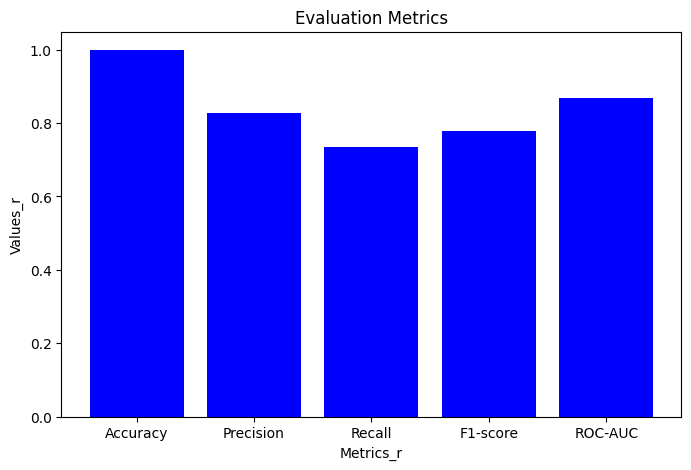

Evaluation metrics of model with adam optimizer


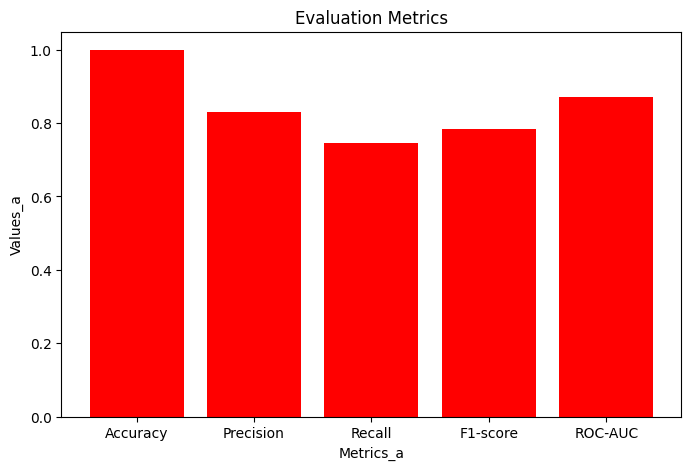

In [9]:
import matplotlib.pyplot as plt
metrics_r= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_r = [accuracy1, precision1, recall1, f1_score1, roc_auc1]
print(values_r)
metrics_a= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_a = [accuracy2, precision2, recall2, f1_score2, roc_auc2]
print(values_a)
print("Evaluation metrics of model with RMS prop optimizer")
plt.figure(figsize=(8, 5))
plt.bar(metrics_r, values_r, color='b')
plt.xlabel('Metrics_r')
plt.ylabel('Values_r')
plt.title('Evaluation Metrics')
plt.show()
print("Evaluation metrics of model with adam optimizer")
plt.figure(figsize=(8, 5))
plt.bar(metrics_a, values_a, color='r')
plt.xlabel('Metrics_a')
plt.ylabel('Values_a')
plt.title('Evaluation Metrics')
plt.show()

precision-recall curve for rms


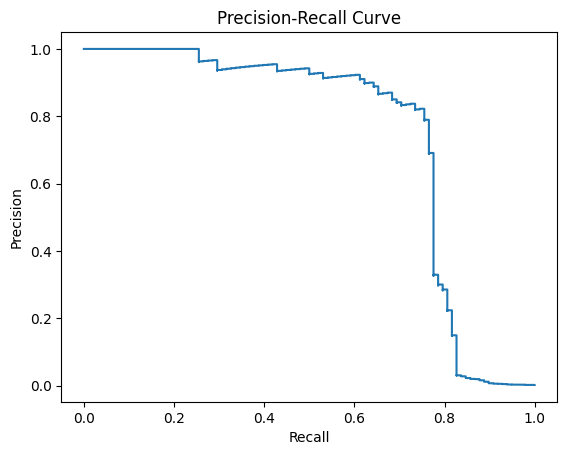

precision-recall curve for adam


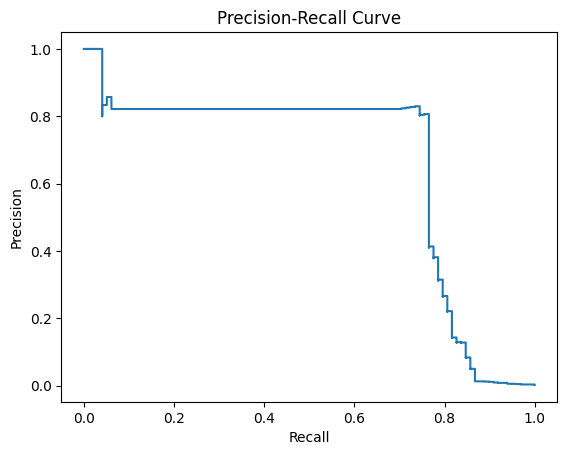

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_rms)
print("precision-recall curve for rms")
disp = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_adam)
print("precision-recall curve for adam")
disp = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()